In [ ]:
import pandas as pd
import seaborn as sns
import loader
import classify

In [2]:
tickets = loader.get_tickets()

In [3]:
tickets

ticket_id,body_text,text,original_tags,tags,normalized_tags
i64,str,str,list[str],list[str],list[str]
354744745,"""Hi, I was trying to cancel my …","""Hi, I was trying to cancel my …","[""siena-follow-needed, WPER-P, complaint-date/2024-10-12, assisted-by-siena, urgent, refund/30-day, #641260, cancel/no-reason, cancel/do-not-like"", ""siena-follow-needed, WPER-P, complaint-date/2024-10-12, assisted-by-siena, urgent, refund/30-day, #641260, cancel/no-reason, cancel/do-not-like""]","[""cancel_no_reason"", ""cancel_do_not_like""]","[""cancel_do_not_like"", ""cancel_do_not_like""]"
359418091,"""Hello! I’d like to cancel my …","""Hello! I’d like to cancel my s…","[""email, #646495, WTR1-P, complaint-date/2024-11-11, product-sensitivity/nausea, internal/log, siena/cancel-f/u, cancel/no-reason, handled-by-siena, siena-follow-needed"", ""email, #646495, WTR1-P, complaint-date/2024-11-11, product-sensitivity/nausea, internal/log, siena/cancel-f/u, cancel/no-reason, handled-by-siena, siena-follow-needed"", ""email, #646495, WTR1-P, complaint-date/2024-11-11, product-sensitivity/nausea, internal/log, siena/cancel-f/u, cancel/no-reason, handled-by-siena, siena-follow-needed""]","[""product_sensitivity_nausea"", ""internal_log"", ""cancel_no_reason""]","[""product_sensitivity_nausea"", ""internal_calcium"", ""cancel_do_not_like""]"
352805964,"""Hi! I’ve experienced some side…","""Hi! I’ve experienced some side…","[""#658096, complaint/side-effects, urgent, complaint-date/2024-09-30, WCON-P, WPSB-B""]","[""complaint_side_effects""]","[""complaint_side_effects""]"
368631002,"""Hello, I just received my new…","""Hello, I just received my new …","[""internal/log, WSLP-B, complaint/quality, #793133, email, complaint-date/2024-12-30"", ""internal/log, WSLP-B, complaint/quality, #793133, email, complaint-date/2024-12-30""]","[""internal_log"", ""complaint_quality""]","[""internal_calcium"", ""complaint_quality""]"
365128060,"""Hello, I ordered the Concept…","""Hello, I ordered the Conceptio…","[""cancel/do-not-like, complaint-date/2024-12-10, complaint/nausea, refund/30-day, internal/log, complaint/smell-taste, order #747245, email, WCON-P"", ""cancel/do-not-like, complaint-date/2024-12-10, complaint/nausea, refund/30-day, internal/log, complaint/smell-taste, order #747245, email, WCON-P"", … ""cancel/do-not-like, complaint-date/2024-12-10, complaint/nausea, refund/30-day, internal/log, complaint/smell-taste, order #747245, email, WCON-P""]","[""cancel_do_not_like"", ""complaint_nausea"", … ""complaint_smell_taste""]","[""cancel_do_not_like"", ""complaint_nausea"", … ""complaint_smell""]"
…,…,…,…,…,…
366340190,"""ORDER NO. #756129 December 09…","""ORDER NO. #756129 December 09,…","[""email, complaint-date/2024-12-16, WEGG-P, cancel/do-not-like, refund/30-day, complaint/nausea, #756129, internal/log"", ""email, complaint-date/2024-12-16, WEGG-P, cancel/do-not-like, refund/30-day, complaint/nausea, #756129, internal/log"", ""email, complaint-date/2024-12-16, WEGG-P, cancel/do-not-like, refund/30-day, complaint/nausea, #756129, internal/log""]","[""cancel_do_not_like"", ""complaint_nausea"", ""internal_log""]","[""cancel_do_not_like"", ""complaint_nausea"", ""internal_calcium""]"
357154182,"""Hello, I am so sorry but aft…","""Hello, I am so sorry but after…","[""internal/log, complaint/nausea, complaint-date/2024-10-27, WTR1-P"", ""internal/log, complaint/nausea, complaint-date/2024-10-27, WTR1-P""]","[""internal_log"", ""complaint_nausea""]","[""internal_calcium"", ""complaint_nausea""]"
351811561,"""I would like to request a refu…","""I would like to request a refu…","[""internal/log, cancel/do-not-like, #630634, complaint/smell-taste, complaint-date/2024-09-23, refund/30-day, WTR2-P"", ""internal/log, cancel/do-not-like, #630634, complaint/smell-taste, complaint-date/2024-09-23, refund/30-day, WTR2-P"", ""internal/log, cancel/do-not-like, #630634, complaint/smell-taste, complaint-date/2024-09-23, refund/30-day, WTR2-P""]","[""internal_log"", ""ca

In [4]:
df = classify.encode_labels(tickets.to_pandas())

In [5]:
df.columns = ['text'] + list(classify.mlb.classes_)

In [6]:
df

,text,abdomen_pain,account_address_change,account_due_date,account_payment_issue,account_receipt,auto_reply,cancel_do_not_like,cancel_miscarriage,cancel_no_reason,...,return_request,ship_damage,shipping_expedite,shipping_lost_stolen,shipping_warehouse_error,side_effects,smell_taste,subscription_reschedule,subscription_swap,subscription_swap_add
0,"Hi, I was trying to cancel my subscription and...",0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Hello! I’d like to cancel my subscription to P...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Hi! I’ve experienced some side effects since s...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Hello, I just received my new order of Perelel...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Hello, I ordered the Conception Support Pack o...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,"ORDER NO. #756129 December 09, 2024 Good after...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1710,"Hello, I am so sorry but after taking these pr...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1711,I would like to request a refund for order # 6...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1712,"Hello, I desperately wanted to like your produ...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cat_freq = df[df.columns[1:]].sum()/df.shape[0]

In [8]:
df

,text,abdomen_pain,account_address_change,account_due_date,account_payment_issue,account_receipt,auto_reply,cancel_do_not_like,cancel_miscarriage,cancel_no_reason,...,return_request,ship_damage,shipping_expedite,shipping_lost_stolen,shipping_warehouse_error,side_effects,smell_taste,subscription_reschedule,subscription_swap,subscription_swap_add
0,"Hi, I was trying to cancel my subscription and...",0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Hello! I’d like to cancel my subscription to P...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Hi! I’ve experienced some side effects since s...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Hello, I just received my new order of Perelel...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Hello, I ordered the Conception Support Pack o...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,"ORDER NO. #756129 December 09, 2024 Good after...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1710,"Hello, I am so sorry but after taking these pr...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1711,I would like to request a refund for order # 6...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1712,"Hello, I desperately wanted to like your produ...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


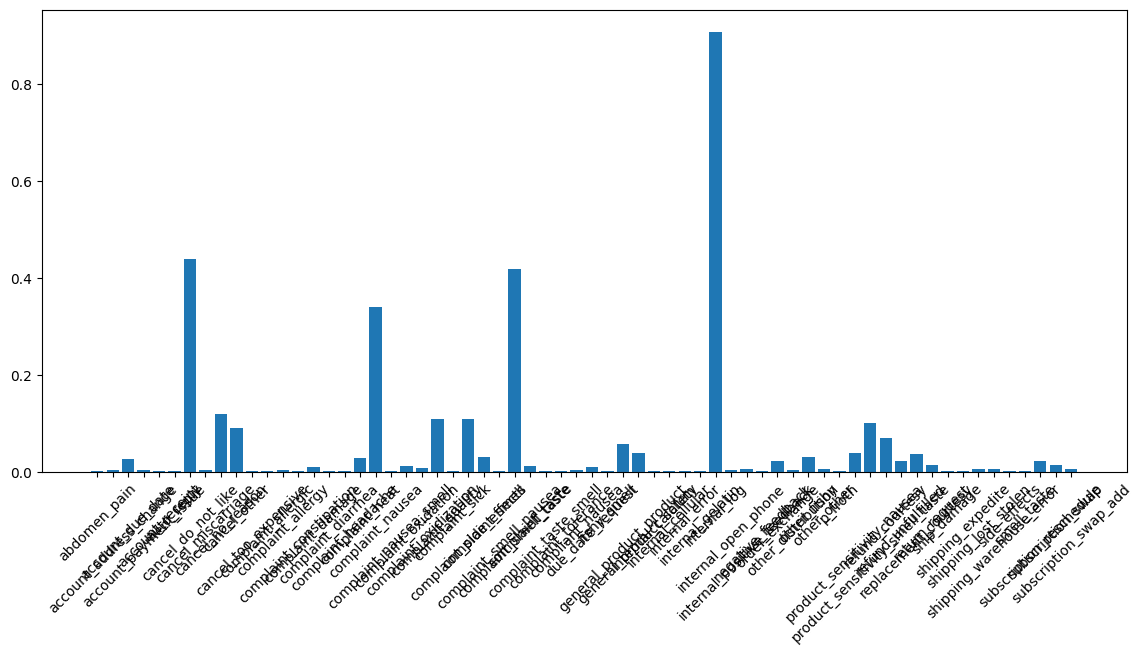

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)
plt.bar(cat_freq.index, cat_freq.values)
_ = plt.xticks(rotation = 45)

In [10]:
# Drop the categories with low frequencies
signif_cols = cat_freq.index[cat_freq.values>0.05]
df0 = df[['text']+list(signif_cols)]

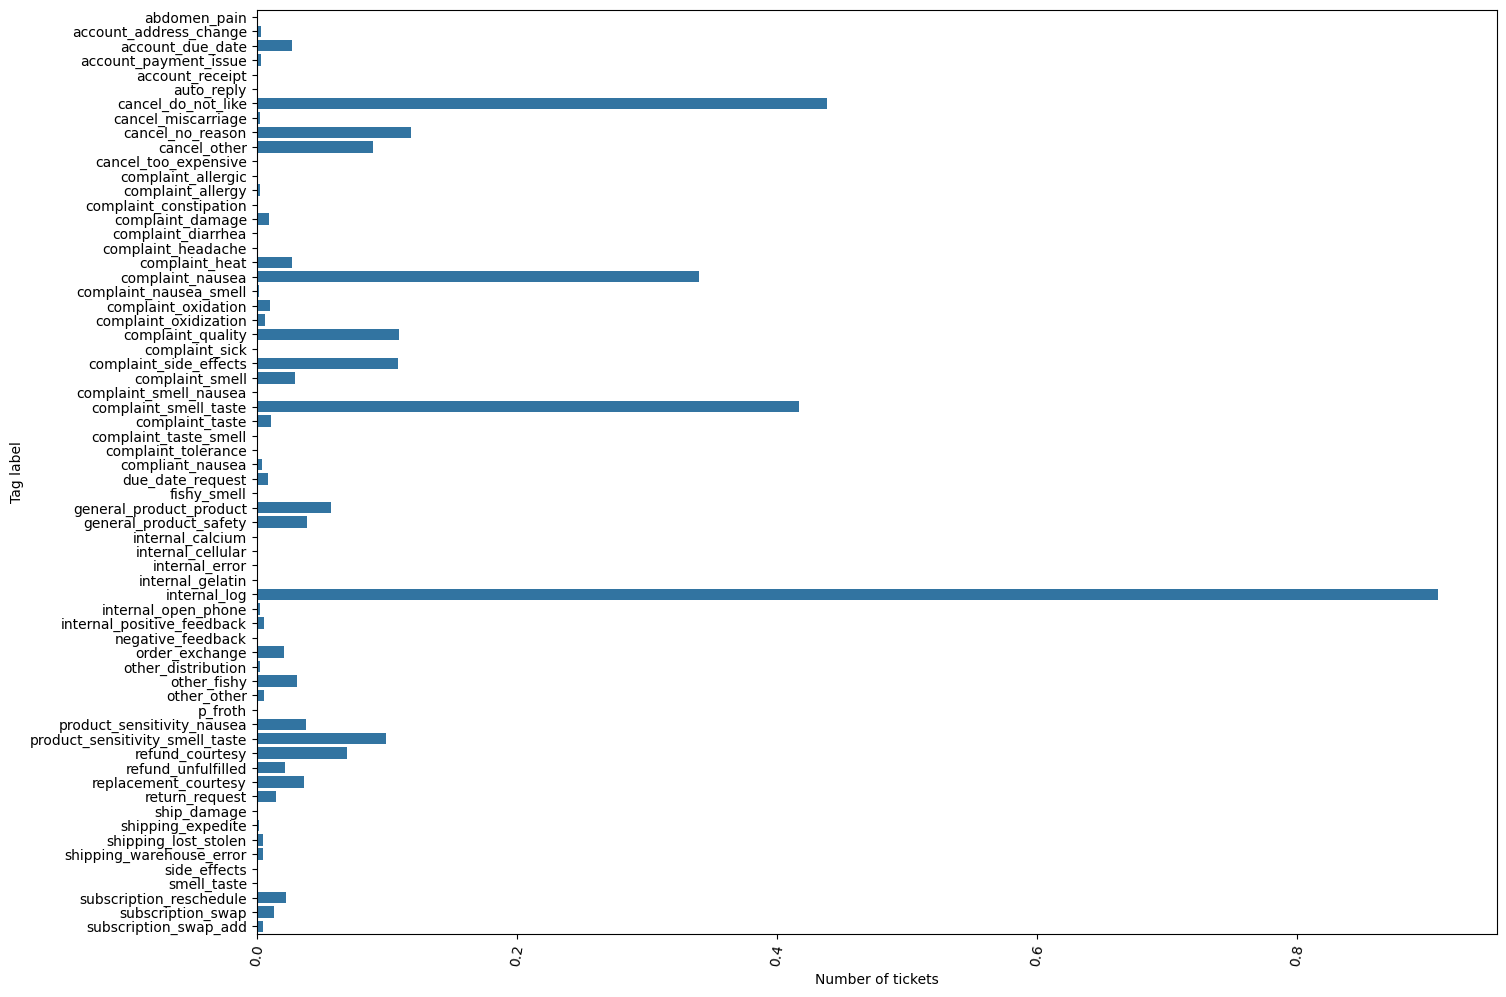

In [11]:
plt.figure(figsize=(16, 12))

ax = sns.barplot(cat_freq, orient="y")
plt.xlabel('Number of tickets')
plt.ylabel('Tag label')
plt.xticks(rotation=80)
plt.show()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sean.pietz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# To reduce the data size we randomly subsample abstracts with a single category
sample_pca = df0.loc[df0.iloc[:,1:].apply(sum, axis=1) == 1,:].sample(n = 80, random_state = 4)

In [23]:
sample_pca

,text,cancel_do_not_like,cancel_no_reason,cancel_other,complaint_nausea,complaint_quality,complaint_side_effects,complaint_smell_taste,general_product_product,internal_log,product_sensitivity_smell_taste,refund_courtesy
924,Hi May i know your return policy? I would like...,1,0,0,0,0,0,0,0,0,0,0
167,"Hi There, I'd like to return the 1st Trimester...",1,0,0,0,0,0,0,0,0,0,0
422,"Hello, My name is Veronica and I was taking th...",0,0,0,0,0,0,0,0,1,0,0
1294,"Hello, I recently got a new order from my subs...",0,0,0,1,0,0,0,0,0,0,0
27,Hello! I ordered a first trimester package a f...,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,"Hi! I’ve tried the conception pack, but cannot...",0,0,0,0,0,0,0,0,1,0,0
709,"Hello, My husband decided not to take the mult...",1,0,0,0,0,0,0,0,0,0,0
80,Hi there. I am emailing to cancel my subscript...,1,0,0,0,0,0,0,0,0,0,0
477,"Hi there, I just started taking my prenatal, t...",0,0,0,0,0,0,0,0,1,0,0


In [24]:
X = TfidfVectorizer(stop_words=stop_words).fit_transform(sample_pca.text).todense()

In [ ]:
cat_freq

In [25]:
X

matrix([[0.01478849, 0.01607186, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], shape=(80, 5231))

In [ ]:
pca = PCA(n_components=2).fit(X)
ata2D = pd.DataFrame(pca.transform(X), columns = ['PC1','PC2'])